## Mini Project: House Price Prediction Model Deployment

Dataset: House price

**Step Pengolahan Data**


1.   EDA
2.   Pre-Processing
3.   Modelling
4.   Model evaluation
etc



In [ ]:
# import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler

#import ML Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Load Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/tyoamazinglib/data_batch32/main/Dataset2_House_Price.csv')
data.head(10)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
5,2012,39223,36,0,1,3926647.2
6,1995,58682,10,0,5,5876376.5
7,2003,86929,100,0,10,8696869.3
8,2012,51522,3,1,5,5154055.2
9,2021,39686,42,1,3,3970892.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   made            10000 non-null  int64  
 1   squareMeters    10000 non-null  int64  
 2   numberOfRooms   10000 non-null  int64  
 3   hasStorageRoom  10000 non-null  int64  
 4   hasGuestRoom    10000 non-null  int64  
 5   price           10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
data.dtypes

made                int64
squareMeters        int64
numberOfRooms       int64
hasStorageRoom      int64
hasGuestRoom        int64
price             float64
dtype: object

In [ ]:
data.shape

(10000, 6)

In [ ]:
data.isna().sum()

made              0
squareMeters      0
numberOfRooms     0
hasStorageRoom    0
hasGuestRoom      0
price             0
dtype: int64

Tidak ada data yang kosong/null value

In [ ]:
# cek data duplikat
dd = data[data.duplicated]
print('Number of duplicates:', dd.shape)

Number of duplicates: (0, 6)


Tidak ada data yang duplikat

# EDA

In [ ]:
data.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,1.000000e+04
mean,2005.48850,49870.13120,50.358400,0.503000,4.99460,4.993448e+06
std,9.30809,28774.37535,28.816696,0.500016,3.17641,2.877424e+06
min,1990.00000,89.00000,1.000000,0.000000,0.00000,1.031350e+04
25%,1997.00000,25098.50000,25.000000,0.000000,2.00000,2.516402e+06
50%,2005.50000,50105.50000,50.000000,1.000000,5.00000,5.016180e+06
75%,2014.00000,74609.75000,75.000000,1.000000,8.00000,7.469092e+06
max,2021.00000,99999.00000,100.000000,1.000000,10.00000,1.000677e+07


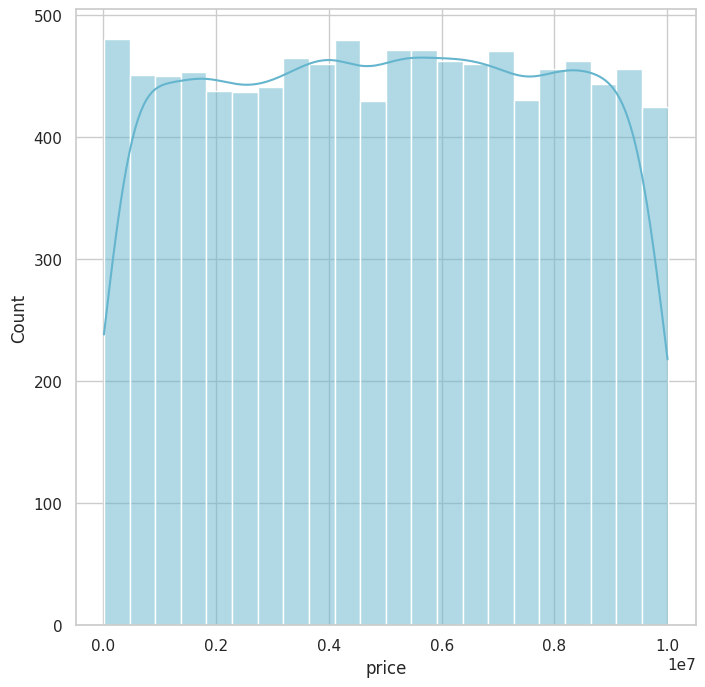

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.histplot(data['price'], kde=True, color='c')
plt.title='Distribusi Harga Rumah'

Hasil Histogram plot diatas menunjukkan Distribusi Normal(Bell Curve)

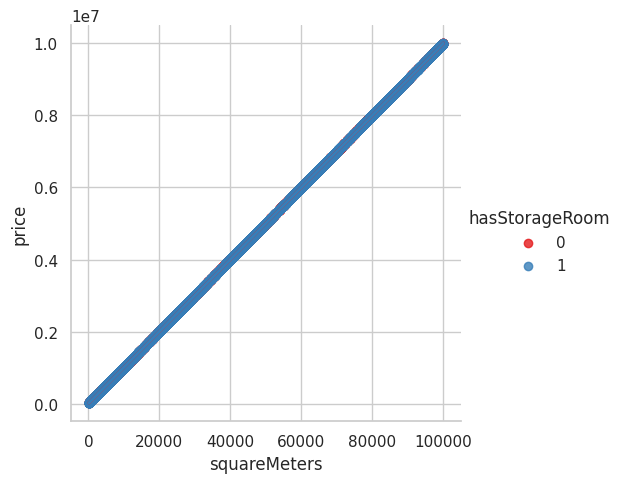

In [ ]:
# Visualisasi Squaremeters dengan price --> Berdasarkan observasi awal keduanya memiliki relasi yang cukup tinggi
ax = sns.lmplot(x='squareMeters', y='price', hue='hasStorageRoom', data=data, palette= 'Set1')

Visualisasi dari plot diatas menunjukkan hubungan yang signifikan antara squareMeters dengan price, yang artinya semakin luas squareMeters maka harga dari rumah akan semakin mahal.

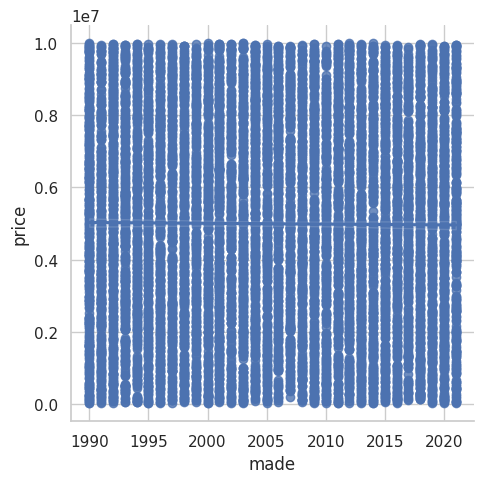

In [ ]:
# Visualisasi made dengan price --> Berdasarkan observasi awal tidak ada hubungan yang signifikan
ax = sns.lmplot(x='made', y='price', data=data, palette= 'Set1')

Visualisasi dari plot diatas tidak menunjukkan hubungan yang signifikan

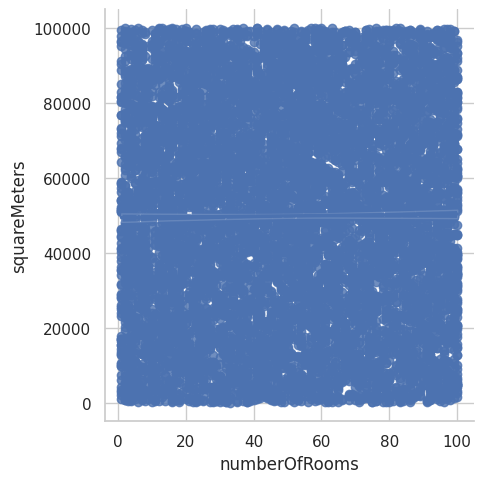

In [ ]:
# Visualisasi untuk cek apakah kolom squareMeters memiliki pengaruh dengan numberOfRooms
ax = sns.lmplot(x='numberOfRooms', y='squareMeters', data=data, palette= 'Set1')

Visualisasi dari plot diatas antara numberOfRooms dan squareMeters tidak menunjukkan hubungan yang signifikan

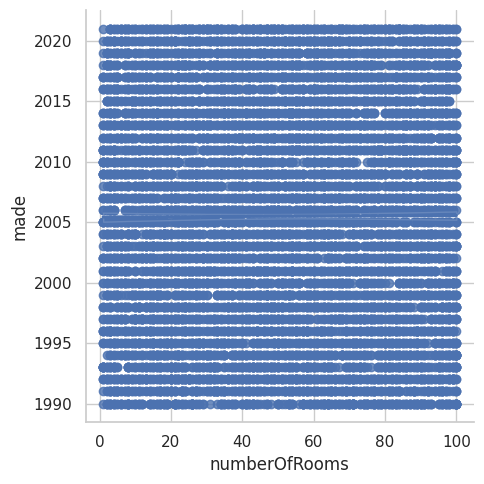

In [ ]:
# Visualisasi untuk cek apakah kolom made memiliki pengaruh dengan numberOfRooms
ax = sns.lmplot(x='numberOfRooms', y='made', data=data, palette= 'Set1')

Visualisasi dari plot diatas antara made dan numberOfRooms tidak menunjukkan hubungan yang signifikan

<Axes: xlabel='hasStorageRoom', ylabel='count'>

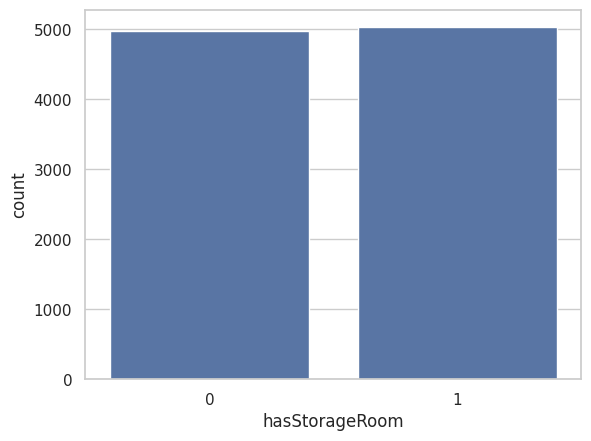

In [ ]:
sns.countplot(x='hasStorageRoom',data=data)

Visualisasi dari kolom hasStorageRoom, estimasi ada sekitar 51000 yang memiliki ruang gudang, dan sisanya tidak memiliki ruang gudang.

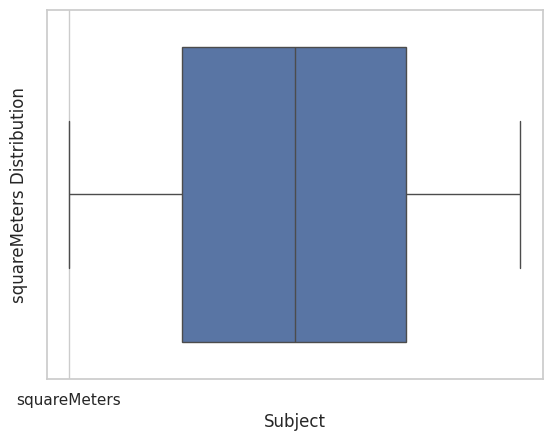

In [ ]:
sqMeters = data['squareMeters']
sns.boxplot(x=sqMeters)
plt.xlabel('Subject')
plt.ylabel('squareMeters Distribution')
plt.xticks([1], ['squareMeters'])
plt.show()

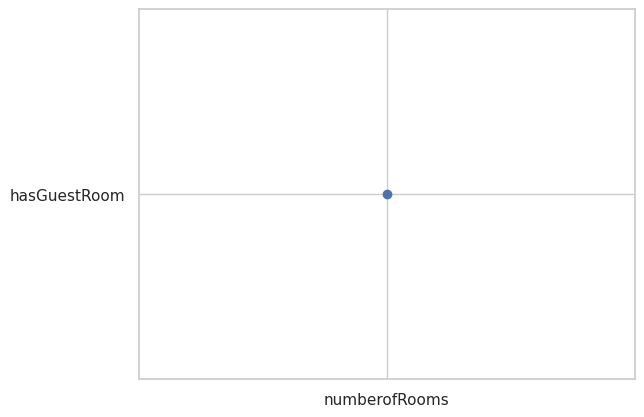

In [ ]:
plt.scatter(x='numberofRooms',y='hasGuestRoom')

visualisasi dari scatterplot diatas, antara numberofRooms dan hasGuestRoom tidak ada pengaruh yang signifikan

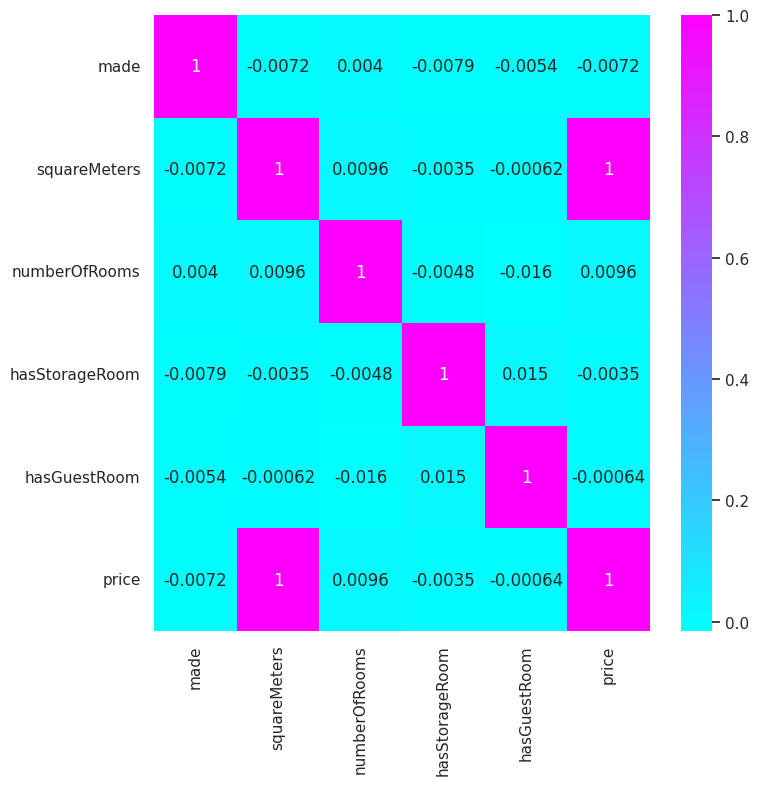

In [ ]:
#Correlation Matrix
f, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.heatmap(data.corr(), annot=True, cmap='cool')

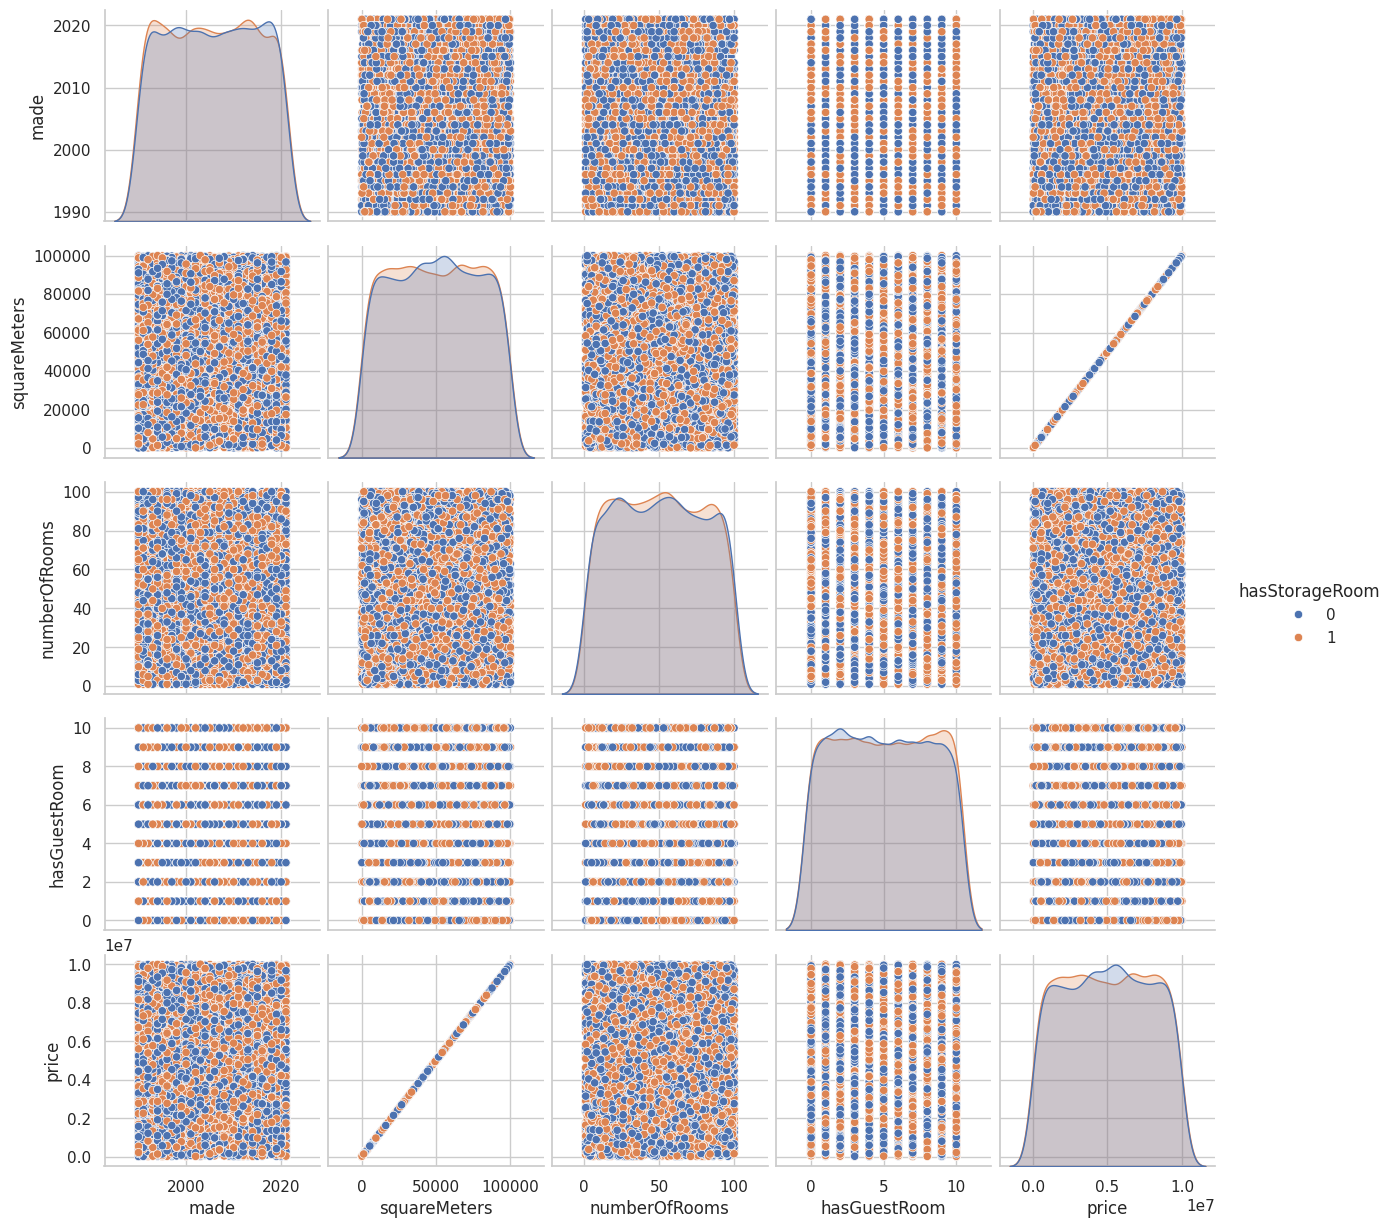

In [ ]:
# pairPlot
sns.pairplot(data, hue ='hasStorageRoom')
# to show
plt.show()

# Data Pre-processing

In [ ]:
# Data sudah berbentuk int dan float (maka tidak perlu encoding)
dfc = data.copy()

# Lakukan scaling (jika perlu) --> Scaling diperlukan ketika range antara kolom sangat jauh
# Standar scaling
scaler = StandardScaler()

#FitTransform untuk melakukan standar scaling
scaled_data = scaler.fit_transform(dfc)

#Konversi scaling kedalam DataFrame
stdr_data = pd.DataFrame(scaled_data, columns=dfc.columns)

print('DataFrame setelah scaling:')
print(stdr_data)

#MinMax Scaling
scaler2 = MinMaxScaler(feature_range=(0,1))

#Robust Scaling
scaler3 = RobustScaler()

DataFrame setelah scaling:
          made  squareMeters  numberOfRooms  hasStorageRoom  hasGuestRoom  \
0    -0.052484      0.891562      -1.643518       -1.006018      0.631373   
1     1.021904      1.073956      -0.394180        0.994018     -0.942810   
2     1.666537      0.203033       0.265193        0.994018      1.261046   
3     0.699588     -0.610092      -0.116549       -1.006018     -0.627973   
4    -1.664066      0.714521      -1.088257        0.994018     -0.313136   
...        ...           ...            ...             ...           ...   
9995  0.377271     -1.673244       1.341012       -1.006018     -0.313136   
9996 -1.664066     -0.190009      -0.741218       -1.006018     -1.572483   
9997 -0.052484      1.180654      -1.643518        0.994018      1.261046   
9998  0.484710      0.318559       0.681639        0.994018     -0.313136   
9999 -1.234311     -1.683183       1.167493        0.994018      0.316537   

         price  
0     0.891687  
1     1.074814

In [ ]:
# Train test split_data
x = stdr_data.drop(['price'], axis=1) # prediktor
y = stdr_data['price'] #Label
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Modelling

## Training and Testing Model
Komparasi antara training dan testing score

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

In [ ]:
x_train_scaled.head()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
0,-1.669715,1.118998,0.222798,1.00025,-0.939629
1,-1.562381,1.020945,1.298720,-0.99975,-0.623482
2,-1.669715,0.995487,0.708699,1.00025,0.324960
3,0.154964,-1.185374,-0.887831,1.00025,0.957254
4,-0.167039,-1.624404,0.292213,-0.99975,0.008813


# **Classification Model**

### **Function Evaluation Metrics**

In [ ]:
# Evaluation Metrics
def classification_eval(aktual, prediksi, name):
  cm = confusion_matrix(aktual, prediksi)
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  print(tp, tn, fp, fn)

  accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
  precision =  round((tp) / (tp+fp) * 100, 2)
  recall = round((tp) / (tp+fn) * 100, 2)

  print('Evaluation Model:', name)
  print(cm)
  print('Accuracy :', accuracy, '%')
  print('Precison :', precision, '%')
  print('Recall   :', recall, '%')

###**Linear Regression**

In [ ]:
# Linear
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
print('Score:', Lin_reg.score(x_train, y_train))
print('Score:', Lin_reg.score(x_test, y_test))

Score: 0.9999986933005185
Score: 0.9999987921640247


###**Ridge Regression**

In [ ]:
# Ridge
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)
print('Score:', ridge_model.score(x_train, y_train))
print('Score:', ridge_model.score(x_test, y_test))

Score: 0.9999986771961296
Score: 0.9999987734963749


###**Lasso Regression**

In [ ]:
# Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)

print('Score:', Lasso.score(x_train, y_train))
print('Score:', Lasso.score(x_test, y_test))

Score: 0.9587699925962818
Score: 0.9586652660286452


###**Logistic Regression**

In [ ]:
# Logistic Regression
klasifikasi = np.linspace(min(y), max(y), num=6) # sesuaikan nilai number untuk mendapatkan nilai score test maximal
y_class = np.digitize(y, klasifikasi) - 1

# y_class digunakan sebagai variable untuk type classification
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size=0.2, random_state=42)

Log_reg = LogisticRegression()
Log_reg.fit(x_train, y_train)
y_train_pred = Log_reg.predict(x_train)
y_test_pred = Log_reg.predict(x_test)
Log_reg.score(x_test, y_test)

print('Score:', Log_reg.score(x_train, y_train))
print('Score:', Log_reg.score(x_test, y_test))

Score: 0.995125
Score: 0.993


###**KNN with MaxMinScaler**

In [ ]:
# KNN
x_train = scaler2.fit_transform(x_train)
x_test = scaler2.fit_transform(x_test)
knn = KNeighborsClassifier(n_neighbors=9) # n_neighbors=9, Mendapatkan score test terbaik
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)
knn.score(x_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)
print(knn.n_samples_fit_)

print('Score:', knn.score(x_train, y_train))
print('Score:', knn.score(x_test, y_test))

[3 2 4 ... 1 1 3]
[[375  24   0   0   0   0]
 [ 27 329  19   0   0   0]
 [  0  28 328  27   0   0]
 [  0   0  24 344  31   0]
 [  0   0   0  29 414   0]
 [  0   0   0   0   1   0]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       399
           1       0.86      0.88      0.87       375
           2       0.88      0.86      0.87       383
           3       0.86      0.86      0.86       399
           4       0.93      0.93      0.93       443
           5       0.00      0.00      0.00         1

    accuracy                           0.90      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.89      0.90      0.89      2000

8000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score: 0.9345
Score: 0.895


###**KNN with StandarScaler**

In [ ]:
# KNN Standar Scaler
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_train_pred = knn.predict(x_train_scaled)
y_test_pred = knn.predict(x_test_scaled)

In [ ]:
classification_eval(y_train, y_train_pred, 'KNN Training')

1446 1555 57 74
Evaluation Model: KNN Training
[[1555   57    0    0    0]
 [  74 1446   68    0    0]
 [   0   59 1540   60    0]
 [   0    0   64 1503   54]
 [   0    0    0   66 1454]]
Accuracy : 95.82 %
Precison : 96.21 %
Recall   : 95.13 %


In [ ]:
classification_eval(y_test, y_test_pred, 'KNN Test')

331 377 22 26
Evaluation Model: KNN Test
[[377  22   0   0   0   0]
 [ 26 331  18   0   0   0]
 [  0  28 328  27   0   0]
 [  0   0  23 347  29   0]
 [  0   0   0  23 420   0]
 [  0   0   0   0   1   0]]
Accuracy : 93.65 %
Precison : 93.77 %
Recall   : 92.72 %


# **Evaluating Model**

In [ ]:
# Model Improvement and Tunning
Lin_reg.fit(x_train, y_train)
score_with_no_scaling = Lin_reg.score(x_test, y_test)
print("Accuracy - Before Scaled:", score_with_no_scaling)

Accuracy - Before Scaled: 0.9612368083605872


In [ ]:
Lin_reg.fit(x_train_scaled, y_train)
score_with_scaling = Lin_reg.score(x_test_scaled, y_test)
print("Accuracy - After Scaled:", score_with_scaling)

Accuracy - After Scaled: 0.9612470446104191


In [ ]:
pctg = round((score_with_scaling - score_with_no_scaling)/score_with_no_scaling, 5)
print(f'Score Improvement: {pctg*100}%')

Score Improvement: 0.001%


# Model Tuning

In [ ]:
# Model Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.1, 1, 10, 100], 'solver':['auto', 'svd', 'saga', 'lsqr', 'cholesky'] }

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print('Parameter Terbaik:', grid_search.best_params_)

#prediksi
y_pred = grid_search.predict(x_test)

print('R2 Score', r2_score(y_test, y_pred))

Parameter Terbaik: {'alpha': 0.1, 'solver': 'lsqr'}
R2 Score 0.9612390933865425


In [ ]:
ridge_model = Ridge(alpha=0.1, solver='lsqr')
ridge_model.fit(x_train, y_train)
print('Score', ridge_model.score(x_test, y_test))

Score 0.9612390933865425


In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print('Score:', Lin_reg.score(x_test, y_test))

Score: 0.9612368083605872


### Berdasarkan hasil di atas, kita akan mengambil model secara berurutan:
1. Linear Regression
2. Ridge Model
3. Logistic Regression
4. Lasso Regression
5. KNN Regressor

Karena Score Testing nya lebih tinggi dari nilai score test yang lainnya.

In [ ]:
import pickle
pickle.dump(ridge_model, open("Ridge_model.pkl","wb"))

# **Mengintegrasi Model kedalam Flask**

In [ ]:
# Deployment
!pip install pyngrok

In [ ]:
!pip install flask

In [ ]:
# pake Flask untuk deploy model
from flask import Flask
from flask import jsonify, request
from pyngrok import ngrok
from datetime import datetime

app = Flask(__name__)

# Load Model ke dalam API
with open('Ridge_model.pkl','rb') as file:
  model = pickle.load(file)

# Route menggunakan model, metode POST
@app.route('/predict', methods=['POST'])
def predict():
  # Ambil JSON data request dari POSTMAN untuk API
  datax = request.get_json()

  # Ekstrak nilai kolom data dari json
  made = datax["made"]
  squareMeters = datax["squareMeters"]
  numberOfRooms = datax["numberOfRooms"]
  hasStorageRoom = datax["hasStorageRoom"]
  hasGuestRoom = datax["hasGuestRoom"]

  # Melakukan prediksi
  prediction = model.predict([[made, squareMeters, numberOfRooms, hasStorageRoom, hasGuestRoom]])
  datax['Prediction'] = prediction[0]

  with open('data_collection.txt', 'a') as file2:
    file2.write("%s\n" %datax)

  return jsonify({"Status":"Sukses", "Prediction": str(prediction[0])})

if __name__== "__main__":
  ngrok.set_auth_token("2iMTdhWRZxqMkrpkPJPHdhsi7uO_RSXxAiHWjH8QWuMwEbi5")
  ngrok_tunnel = ngrok.connect(5000)
  print("Public URL: ", ngrok_tunnel.public_url)
  app.run()

Public URL:  https://3b6d-34-23-173-117.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


# Kesimpulan

Dari data diatas dapat disimpulkan bahwa:


1.   Data tersebut hanya menjelaskan **harga rumah di satu lokasi** pada waktu tertentu berdasarkan ukuran bangunan, tanpa melihat kapan pembuatan rumah yang menentukan depresiasinya dan jumlah ruangan yang dimilikinya.

      Jika ingin melihat harga lebih tepat dan memiliki korelasi antara jumlah ruangan dan harga, kurang lengkap karena:

     ◘ Tidak ada ukuran per ruangan, tinggi bangunan, apakah bangunan dengan 1 lantai atau beberapa lantai ke atas, apakah rumah tinggal/sewa, .

     ◘ Jika ini ada rumah dengan beberapa lantai, maka bisa dipastikan ada ruangan kecil didalam ruangan besar, walaupun nilai NumberofRooms kecil bisa dipastikan ukuran ruangan/kamar itu besar dengan beberapa ruangan/kamar/kecil yang didalamnya tersedia guestroom/ruang tamu kecil.

     ◘ Jika hanya satu lantai, berarti hanya terdapat ruangan kecil dengan didalamnya ada beberapa yang memiliki guestofRoom.


2.   Model yang paling tepat adalah Model Linear Regression

3.   Untuk perbaikan maka data ini harus dilakukan: Jika ingin membuat data lebih bermakna sehingga kolom-kolom yang tersedia memberikan manfaat dan untuk memprediksi price lebih akurat karena ada korelasi antar kolom, maka:

      ○ penambahan kolom ukuran ruangan terutama untuk size(numberofRooms)

      ○ penambahan kolom NumberofFloors, jika berbentuk bangunan tinggi., seperti contohnya Apartemen atau Rumah Susun.

      **Tambahan:**

      ○ Penambahan kolom keterangan kelas ruangan, jika rumah tersebut rumah sewa yang memiliki kelas yang menentukan ukuran, dan yang menentukan memiliki ruang guestofRoom atau tidak.





(Optional) Bisa menambahkan Model Deployment 1 dengan Flask untuk extra score.